In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from df_utils import * 

In [2]:
# Open files
base_dir = "/home/lmlepin/Desktop/dm_sets/cosmics_mpid_training_set/"
plots_dir = "/home/lmlepin/Desktop/Plots_DT_Drive/2023/CNN_plots/"



df_test = pd.read_csv(base_dir + "DM-CNN_test_set_DM-CNN_scores_inference_8441_steps_no_rotation_LM.csv")
df_training = pd.read_csv(base_dir + "DM-CNN_training_set_DM-CNN_scores_inference_8441_steps_no_rotation_LM.csv")


df_background = df_test[df_test['run_number'] == 1]
df_signal = df_test[df_test['run_number'] == 100]
df_background_training = df_training[df_training['run_number'] == 1]
df_signal_training = df_training[df_training['run_number'] == 100]


df_signal['signal_score'] = logit_transform(df_signal['signal_score'])
df_signal_training['signal_score'] = logit_transform(df_signal_training['signal_score'])
df_background['signal_score'] = logit_transform(df_background['signal_score'])
df_background_training['signal_score'] = logit_transform(df_background_training['signal_score'])

/home/lmlepin/anaconda3/envs/dark_trident/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/lmlepin/anaconda3/envs/dark_trident/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/lmlepin/anaconda3/envs/dark_trident/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [3]:
# plot globals:

axis_label_size = 50
title_size = 50
legend_text_size = 25
text_padding = 20
x_ticks_size = 45
y_ticks_size = 45

figure_size = (20,18)

[-11.         -10.24137931  -9.48275862  -8.72413793  -7.96551724
  -7.20689655  -6.44827586  -5.68965517  -4.93103448  -4.17241379
  -3.4137931   -2.65517241  -1.89655172  -1.13793103  -0.37931034
   0.37931034   1.13793103   1.89655172   2.65517241   3.4137931
   4.17241379   4.93103448   5.68965517   6.44827586   7.20689655
   7.96551724   8.72413793   9.48275862  10.24137931  11.        ]
[-11.         -10.24137931  -9.48275862  -8.72413793  -7.96551724
  -7.20689655  -6.44827586  -5.68965517  -4.93103448  -4.17241379
  -3.4137931   -2.65517241  -1.89655172  -1.13793103  -0.37931034
   0.37931034   1.13793103   1.89655172   2.65517241   3.4137931
   4.17241379   4.93103448   5.68965517   6.44827586   7.20689655
   7.96551724   8.72413793   9.48275862  10.24137931  11.        ]
0.9977761304670126
0.9983591089961849
0.9989339019189766
0.9989961777537547


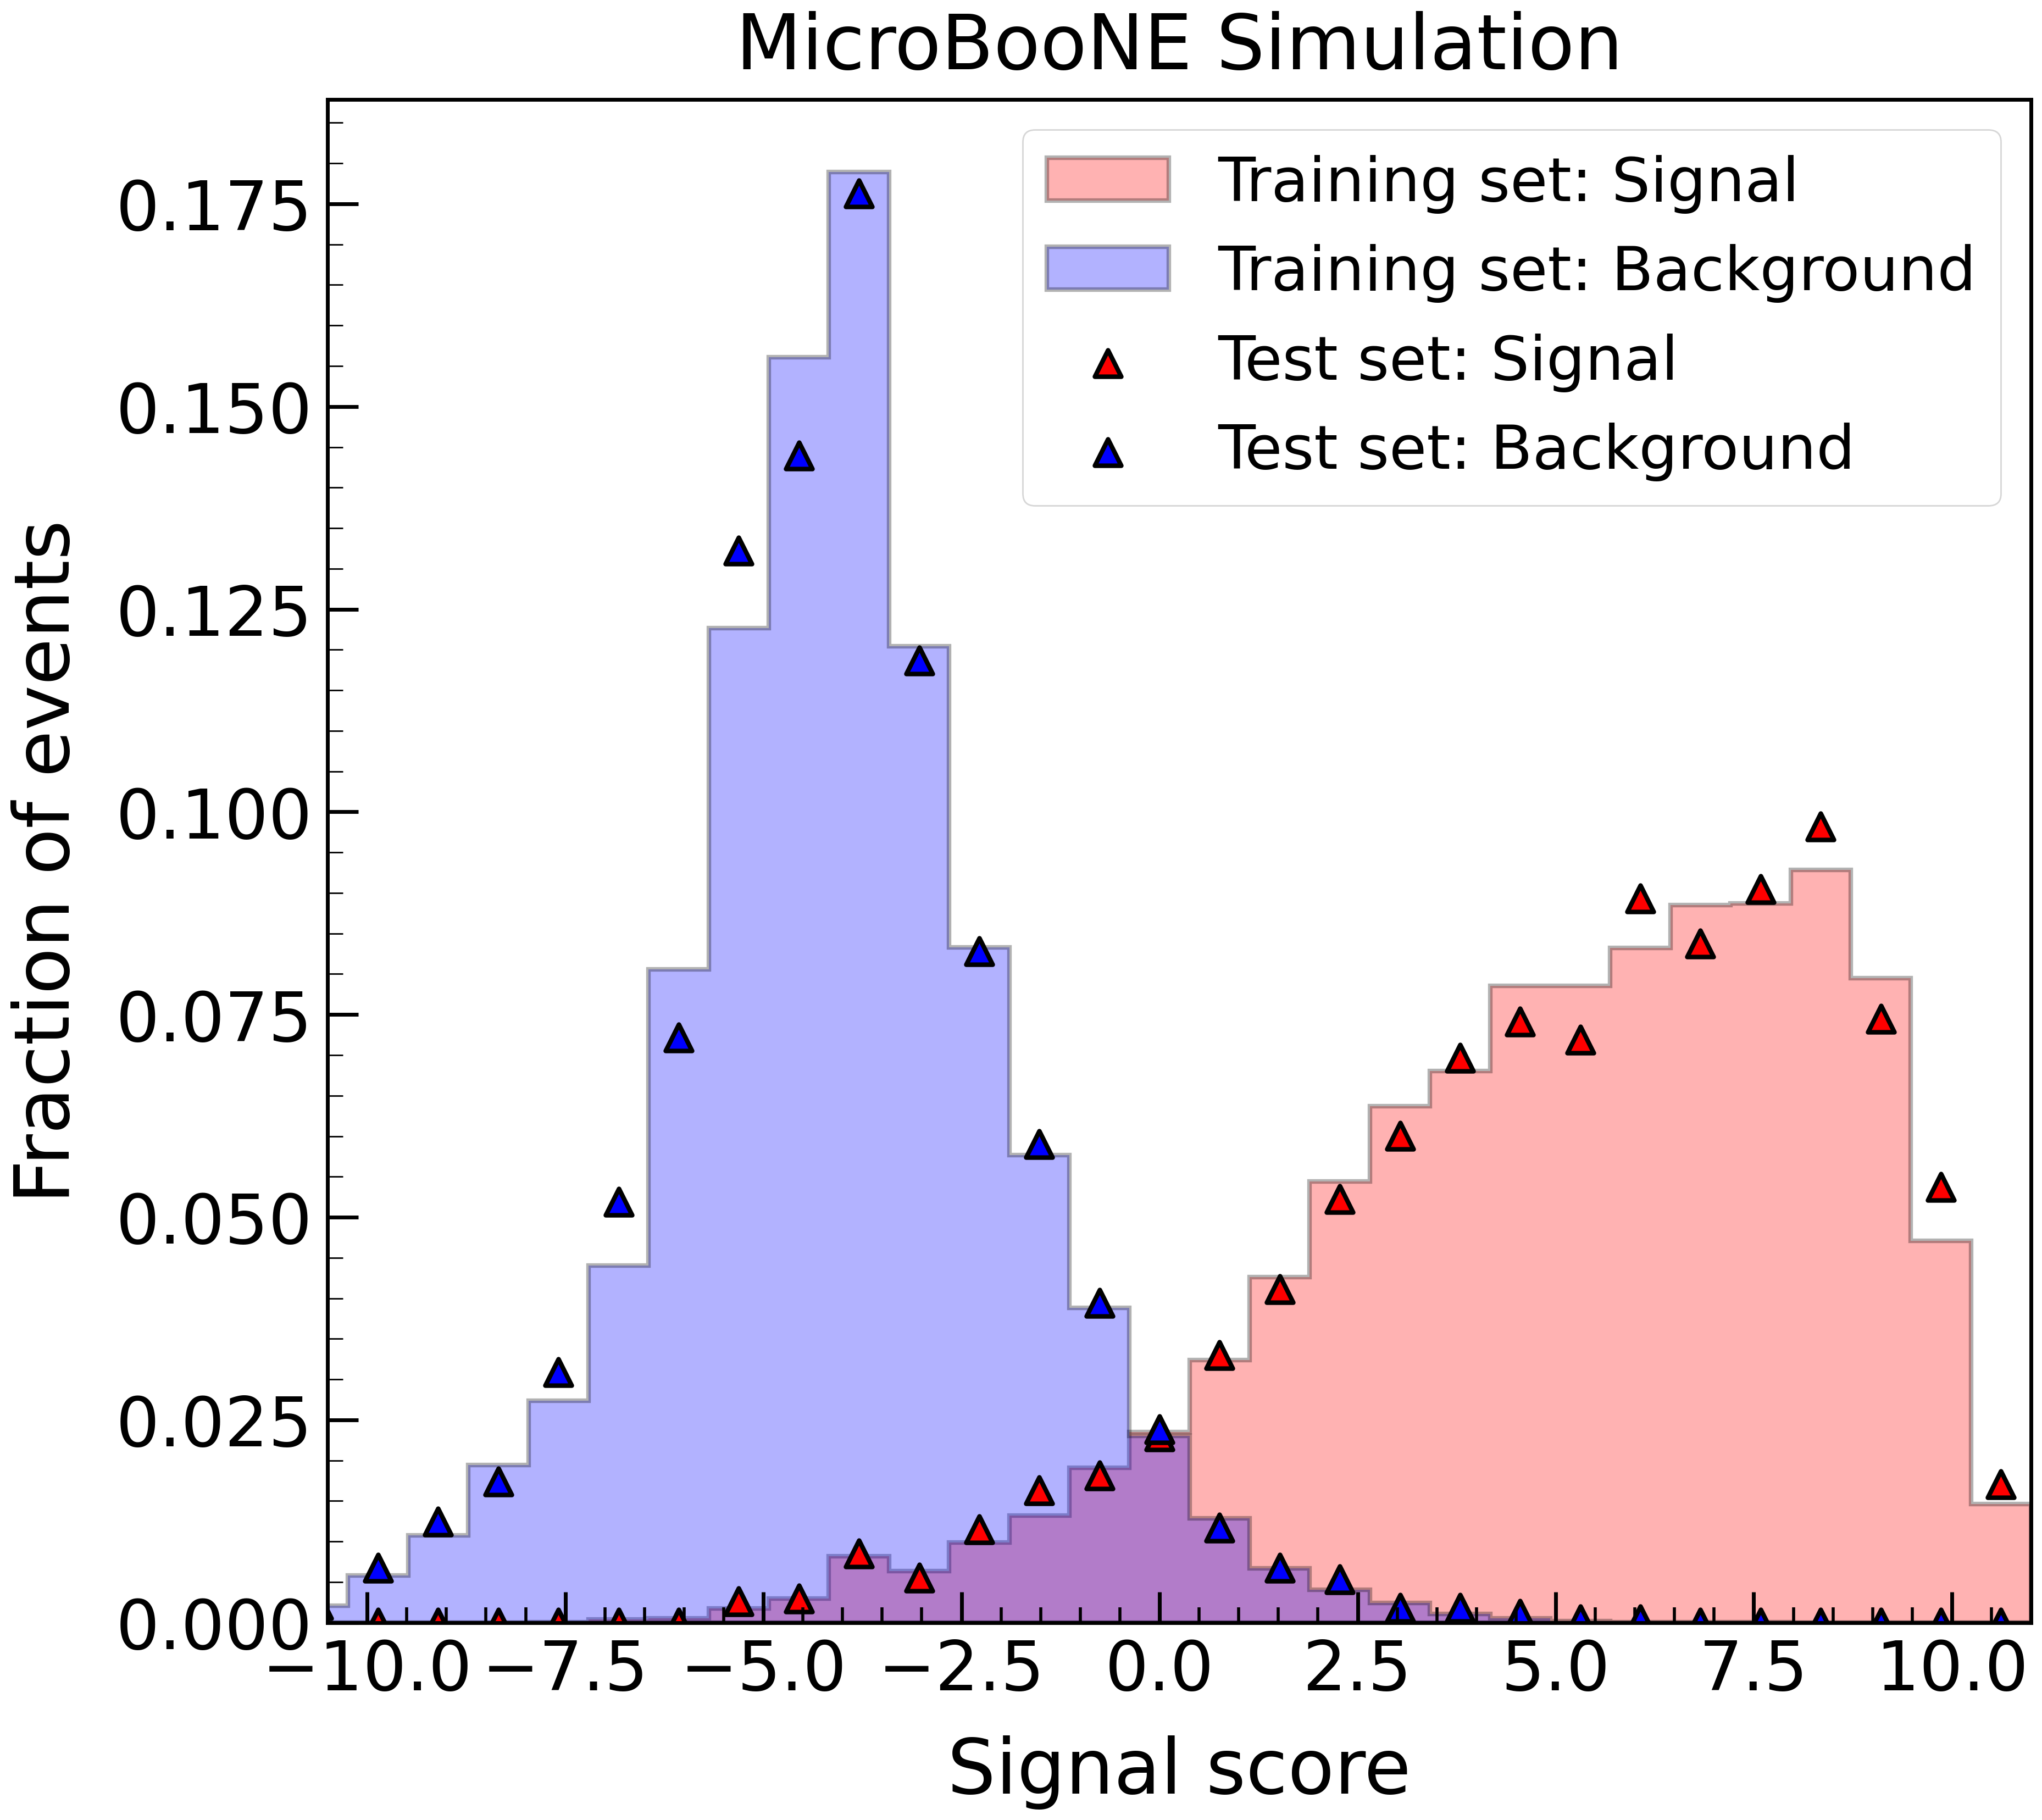

In [20]:
fig = plt.figure(figsize=figure_size,dpi=200)
ax = fig.add_subplot(111)
nbins = 30

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

binning = np.linspace(-11.,11.,nbins)
    
(counts_signal, bins_signal) = np.histogram(df_signal['signal_score'], bins = binning)
(counts_signal_training, bins_signal_training) = np.histogram(df_signal_training['signal_score'], bins = binning)

(counts_background, bins_background) = np.histogram(df_background['signal_score'], bins = binning)
(counts_background_training, bins_background_training) = np.histogram(df_background_training['signal_score'], bins = binning)

plt.hist(bins_signal_training[:-1], bins = bins_signal_training,weights=counts_signal_training/len(df_signal_training), histtype='stepfilled',label="Training set: Signal" ,lw=3,color='red',edgecolor='black',alpha=0.3)
plt.hist(bins_background_training[:-1], bins = bins_background_training,weights=counts_background_training/len(df_background_training), histtype='stepfilled',label="Training set: Background" ,lw=3,color='blue',alpha=0.3,edgecolor='black')

print(bins_signal_training)
print(bins_signal)


plt.scatter(0.5*(bins_signal[1:] + bins_signal[:-1]), counts_signal/len(df_signal), marker='^', color='red',s=300,lw=3,edgecolor='black', label="Test set: Signal")
plt.scatter(0.5*(bins_background[1:] + bins_background[:-1]), counts_background/len(df_background), marker='^',s=300, lw=3,edgecolor='black',color='blue',label="Test set: Background")

print(np.sum(counts_signal/len(df_signal)))
print(np.sum(counts_signal_training/len(df_signal_training)))
print(np.sum(counts_background/len(df_background)))
print(np.sum(counts_background_training/len(df_background_training)))


plt.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False)
plt.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False)
plt.legend(loc='upper right',fontsize=40,facecolor='white')
#plt.yscale('log')
plt.xticks(size=45)
plt.yticks(size=45)
plt.xlim(-10.5,11.)
plt.title(r"MicroBooNE Simulation",fontsize=title_size,pad=text_padding)
plt.xlabel(r'Signal score',fontsize=axis_label_size,labelpad=text_padding)
plt.ylabel("Fraction of events",fontsize=axis_label_size, labelpad=text_padding)
plt.savefig(plots_dir + "CNN_test_set_score_distribution_ratio_0.6.pdf",bbox_inches="tight")
plt.savefig(plots_dir + "CNN_test_set_score_distribution_ratio_0.6.png",bbox_inches="tight")
plt.show()

In [ ]:
# Prepare test set for confusion matrix 
#df_test = df_test[df_test['run_number'] >= 0]
df_test = df_test[df_test['signal_score'] >= 0]
print(len(df_test[df_test['run_number']==100]))
df_test.loc[df_test["run_number"] != 100, "run_number"] = 0.5
df_test.loc[df_test["run_number"] == 100, "run_number"] = 2


print(len(df_test[df_test['run_number']==0.5]))
print(len(df_test[df_test['run_number']==2]))

In [ ]:
# Plot confusion matrix

plt.figure(figsize=(16,14),dpi=300)

ybins_2d = [0.,0.5, 1.0]
xbins_2d = [0.,1.0, 2.0]

hist, xbins, ybins, im = plt.hist2d(df_test['run_number'],df_test['signal_score'],bins=(xbins_2d,ybins_2d),cmap='turbo')

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        bin_text =  str(int(hist.T[i,j])) +"\n" + "{:.1f}".format(100*round(int(hist.T[i,j])/(len(df_test)),2)) + "%"
        plt.text(xbins[j] + 0.5,ybins[i] + 0.25, bin_text , 
                color="white", ha="center", va="center", fontweight="bold", fontsize=38)


plt.title("CNN Confusion Matrix",size=45,pad=15)

n_bkg_true = len(df_test[df_test['run_number']== 0.5])
n_signal_true = len(df_test[df_test['run_number']==2])
n_bkg_pred = len(df_test[df_test['signal_score'] < 0.5])
n_signal_pred =  len(df_test[df_test['signal_score'] >= 0.5])

bkg_true_text = 'Background \n' + str(n_bkg_true)
signal_true_text = 'Signal \n' + str(n_signal_true)

bkg_pred_text = 'Background \n' + str(n_bkg_pred)
signal_pred_text = 'Signal \n' + str(n_signal_pred)

plt.xticks([0.5, 1.5],[bkg_true_text,signal_true_text],size=40)
plt.yticks([0.3, 0.75],[bkg_pred_text,signal_pred_text],size=40,ha='center',va='center',rotation=90)
plt.tick_params(axis='y', which='both',pad=40)
#plt.yticks([1,2,3,4],size=40)
#plt.xlim(0,4)
#plt.ylim(0,4)
plt.xlabel('True label',size=45,labelpad=15)
plt.ylabel('Predicted label',size=45,labelpad=30)
plt.savefig(plots_dir + "CNN_test_set_confusion_matrix.pdf",bbox_inches="tight")
plt.savefig(plots_dir + "CNN_test_set_confusion_matrix.png",bbox_inches="tight")

In [ ]:
plt.figure(figsize=(16,14),dpi=300)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(3.5)  # change width
    ax.spines[axis].set_color('black')    # change color
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
  

ybins_2d = [0.,0.5, 1.0]
xbins_2d = [0.,1.0, 2.0]

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        bin_text =  str(int(hist.T[i,j])) +"\n" + "{:.1f}".format(100*round(int(hist.T[i,j])/(len(df_test)),2)) + "%"
        plt.text(xbins[j] + 0.5,ybins[i] + 0.25, bin_text , 
                color="black", ha="center", va="center", fontweight="bold", fontsize=38)


plt.title("CNN Confusion Matrix",size=45,pad=15)

n_bkg_true = len(df_test[df_test['run_number']== 0.5])
n_signal_true = len(df_test[df_test['run_number']==2])
n_bkg_pred = len(df_test[df_test['signal_score'] < 0.5])
n_signal_pred =  len(df_test[df_test['signal_score'] >= 0.5])

bkg_true_text = 'Background \n' + str(n_bkg_true)
signal_true_text = 'Signal \n' + str(n_signal_true)

bkg_pred_text = 'Background \n' + str(n_bkg_pred)
signal_pred_text = 'Signal \n' + str(n_signal_pred)

plt.xticks([0.5, 1.5],[bkg_true_text,signal_true_text],size=40)
plt.yticks([0.3, 0.75],[bkg_pred_text,signal_pred_text],size=40,ha='center',va='center',rotation=90)
plt.tick_params(axis='y', which='both',pad=40)
plt.xlim(0,2.0)
plt.axhline(0.5,0.,1.0,lw=2.,color='black')
plt.axvline(1.0,0.,1.0,lw=2.,color='black')
plt.xlabel('True label',size=45,labelpad=15)
plt.ylabel('Predicted label',size=45,labelpad=30)
plt.savefig(plots_dir + "CNN_test_set_confusion_matrix_white.pdf",bbox_inches="tight")
plt.savefig(plots_dir + "CNN_test_set_confusion_matrix_white.png",bbox_inches="tight")